In [1]:
import radiopropa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(0,-100)
X

array([   0.        ,   -2.04081633,   -4.08163265,   -6.12244898,
         -8.16326531,  -10.20408163,  -12.24489796,  -14.28571429,
        -16.32653061,  -18.36734694,  -20.40816327,  -22.44897959,
        -24.48979592,  -26.53061224,  -28.57142857,  -30.6122449 ,
        -32.65306122,  -34.69387755,  -36.73469388,  -38.7755102 ,
        -40.81632653,  -42.85714286,  -44.89795918,  -46.93877551,
        -48.97959184,  -51.02040816,  -53.06122449,  -55.10204082,
        -57.14285714,  -59.18367347,  -61.2244898 ,  -63.26530612,
        -65.30612245,  -67.34693878,  -69.3877551 ,  -71.42857143,
        -73.46938776,  -75.51020408,  -77.55102041,  -79.59183673,
        -81.63265306,  -83.67346939,  -85.71428571,  -87.75510204,
        -89.79591837,  -91.83673469,  -93.87755102,  -95.91836735,
        -97.95918367, -100.        ])

In [3]:
def funct(x):
    return np.sin(x*2*np.pi/70)
def funct_grad(x):
    return np.cos(x*2*np.pi/70)*2*np.pi/70
def funct_integ(x):
    return -np.cos(x*2*np.pi/70)/(2*np.pi/70)

In [4]:
N = funct(X)
N

array([ 0.        , -0.18216048, -0.35822543, -0.52230331, -0.66890369,
       -0.79312096, -0.89079852, -0.95866785, -0.99445788, -0.99697099,
       -0.96612309, -0.90294642, -0.80955502, -0.68907398, -0.5455349 ,
       -0.38374093, -0.20910607, -0.02747403,  0.15507736,  0.33243949,
        0.49867741,  0.6482284 ,  0.77608812,  0.8779781 ,  0.95048885,
        0.99119399,  0.99873143,  0.97284894,  0.91441262,  0.82537789,
        0.70872405,  0.56835463,  0.40896671,  0.2358938 ,  0.05492732,
       -0.12787716, -0.30640257, -0.47467502, -0.62706371, -0.75846937,
       -0.86449484, -0.94159227, -0.98718178, -0.99973785, -0.97884033,
       -0.92518848, -0.84057763, -0.72783906, -0.59074527, -0.43388374])

In [5]:
data = np.vstack((X,N)).T
header = ['depth','ior']

import csv
file_name = 'data.csv'
with open(file_name, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

In [6]:
ice_model = radiopropa.IceModel_Data1D()
#ice_model.loadDataFromVectors(radiopropa.DoubleVector_1D(X),radiopropa.DoubleVector_1D(N))
#ice_model.loadDataFromCSV(file_name)
ice_model.loadDataFromVector(radiopropa.DoubleVector_2D(data))

In [7]:
N_ = []
for x in X:
    N_.append(ice_model.getValue(radiopropa.Vector3d(0,0,x)))

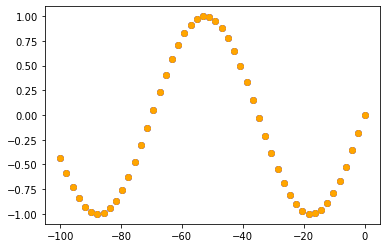

In [8]:
plt.scatter(X,N,c='blue')
plt.scatter(X,N_,c='orange')
plt.show()

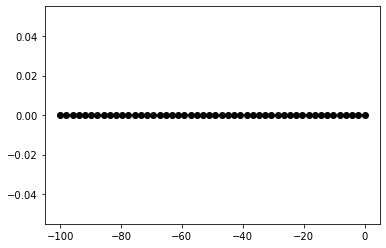

In [9]:
plt.scatter(X,N_-N,c='black')
plt.show()

In [10]:
step = X[1]-X[0]
Z = np.concatenate((X+step/4,X+step/2,X+step*3/4))
Z

array([  -0.51020408,   -2.55102041,   -4.59183673,   -6.63265306,
         -8.67346939,  -10.71428571,  -12.75510204,  -14.79591837,
        -16.83673469,  -18.87755102,  -20.91836735,  -22.95918367,
        -25.        ,  -27.04081633,  -29.08163265,  -31.12244898,
        -33.16326531,  -35.20408163,  -37.24489796,  -39.28571429,
        -41.32653061,  -43.36734694,  -45.40816327,  -47.44897959,
        -49.48979592,  -51.53061224,  -53.57142857,  -55.6122449 ,
        -57.65306122,  -59.69387755,  -61.73469388,  -63.7755102 ,
        -65.81632653,  -67.85714286,  -69.89795918,  -71.93877551,
        -73.97959184,  -76.02040816,  -78.06122449,  -80.10204082,
        -82.14285714,  -84.18367347,  -86.2244898 ,  -88.26530612,
        -90.30612245,  -92.34693878,  -94.3877551 ,  -96.42857143,
        -98.46938776, -100.51020408,   -1.02040816,   -3.06122449,
         -5.10204082,   -7.14285714,   -9.18367347,  -11.2244898 ,
        -13.26530612,  -15.30612245,  -17.34693878,  -19.38775

In [11]:
N__ = []
mask = (Z>-100)
for z in Z[mask]:
    N__.append(ice_model.getValue(radiopropa.Vector3d(0,0,z)))

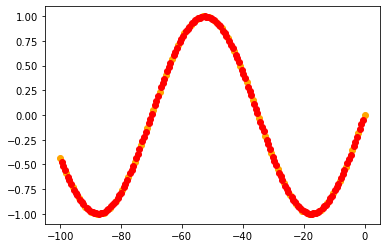

In [12]:
plt.scatter(X,N_,c='orange')
plt.scatter(Z[mask],N__,c='red')
plt.show()

In [13]:
interval = [0,-100]
(funct_integ(interval[1]) - funct_integ(interval[0])) / (interval[1]-interval[0])

-0.21178401439333194

In [14]:
ice_model.getAverageValue(radiopropa.Vector3d(0,0,interval[1]),radiopropa.Vector3d(0,0,interval[0]))

-0.21119146243179657

In [15]:
G = []
for z in Z[mask]:
    G.append(ice_model.getGradient(radiopropa.Vector3d(0,0,z)).z)

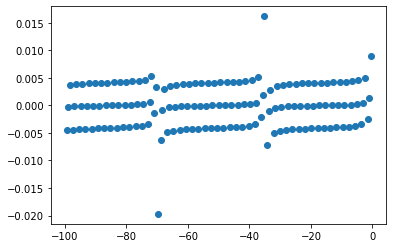

In [16]:
plt.scatter(Z[mask],(G-funct_grad(Z[mask]))/N__)
plt.show()

In [17]:
G = []
for x in X[1:-2]:
    G.append(ice_model.getGradient(radiopropa.Vector3d(0,0,x)).z)

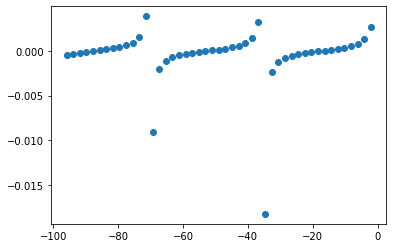

In [18]:
plt.scatter(X[1:-2],(G-funct_grad(X[1:-2]))/N_[1:-2])
plt.show()